<a href="https://colab.research.google.com/github/Luckyaman/Assignment-1-Amanul-Islam-CS6000/blob/main/To_detect_anomaly_in_fake_base_station_z_score_based_threshold_Using_autoencoder_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

#Read the CSV file in a dataframe

df=pd.read_csv("/content/drive/MyDrive/UCCS New Research/Fake Base Station/Data/Fake_2nd_Batch_PCAP_logs_processed.csv")

In [ ]:
# Get the columns Name

col_name=df.columns

# Print the colums Name

print(col_name)

Index(['Timestamp', 'Timestamp (s)', 'File path', 'Sample number',
       'Packet number', 'Size (B)', 'Layers', 'Packet Information Summary',
       'Unnamed: 8'],
      dtype='object')


In [ ]:
#Checking Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2396050 entries, 0 to 2396049
Data columns (total 9 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Timestamp                   object 
 1   Timestamp (s)               float64
 2   File path                   object 
 3   Sample number               int64  
 4   Packet number               int64  
 5   Size (B)                    int64  
 6   Layers                      object 
 7   Packet Information Summary  object 
 8   Unnamed: 8                  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 164.5+ MB


In [ ]:
# Viewing the first 20 lines
df.head(100)

,Timestamp,Timestamp (s),File path,Sample number,Packet number,Size (B),Layers,Packet Information Summary,Unnamed: 8
0,2024-06-16 20:09:06.980800,1.718569e+09,./Fake_2nd_Batch_PCAP_logs/ue_mac_nr_1.pcap,1,0,111,user_dlt udp mac-nr _ws.malformed,RRC Setup[Malformed Packet],NaN
1,2024-06-16 20:09:07.000050,1.718569e+09,./Fake_2nd_Batch_PCAP_logs/ue_mac_nr_1.pcap,1,1,41,user_dlt udp mac-nr,RAR (RA-RNTI=57) (RAPID=0 TA=4 Temp C-RNTI=179...,NaN
2,2024-06-16 20:09:07.001758,1.718569e+09,./Fake_2nd_Batch_PCAP_logs/ue_mac_nr_1.pcap,1,2,42,user_dlt udp mac-nr,RRC Setup Request (Short BSR LCG ID=0 BS=1) ...,NaN
3,2024-06-16 20:09:07.015084,1.718569e+09,./Fake_2nd_Batch_PCAP_logs/ue_mac_nr_1.pcap,1,3,356,user_dlt udp mac-nr,RRC Setup (Padding 2 bytes),NaN
4,2024-06-16 20:09:07.045923,1.718569e+09,./Fake_2nd_Batch_PCAP_logs/ue_mac_nr_1.pcap,1,4,559,user_dlt udp mac-nr,"RRC Setup Complete, Registration request [33-...",NaN
...,...,...,...,...,...,...,...,...,...
95,2024-06-16 20:09:11.485010,1.718569e+09,./Fake_2nd_Batch_PCAP_logs/ue_mac_nr_1.pcap,1,95,419,user_dlt udp mac-nr,"RRC Setup Complete, Registration request [33-...",NaN
96,2024-06-16 20:09:11.544509,1.718569e+09,./Fake_2nd_Batch_PCAP_logs/ue_mac_nr_1.pcap,1,96,544,user_dlt udp mac-nr,"RRC Setup Complete, Registration request [33-...",NaN
97,2024-06-16 20:09:11.604524,1.718569e+09,./Fake_2nd_Batch_PCAP_logs/ue_mac_nr_1.pcap,1,97,419,user_dlt udp mac-nr,"RRC Setup Complete, Registration request [33-...",NaN
98,2024-06-16 20:09:11.664992,1.718569e+09,./Fake_2nd_Batch_PCAP_logs/ue_mac_nr_1.pcap,1,98,544,user_dlt udp mac-nr,"RRC Setup Complete, Registration request [33-...",NaN


In [ ]:
#Basic Statistics

df.describe()

,Timestamp (s),Sample number,Packet number,Size (B),Unnamed: 8
count,2.396050e+06,2.396050e+06,2.396050e+06,2.396050e+06,0.0
mean,1.718755e+09,7.438926e+02,1.568155e+03,4.302526e+02,NaN
std,8.547763e+04,4.265222e+02,9.296210e+02,4.784064e+01,NaN
min,1.718569e+09,1.000000e+00,0.000000e+00,3.400000e+01,NaN
25%,1.718688e+09,3.800000e+02,7.690000e+02,4.190000e+02,NaN
50%,1.718757e+09,7.390000e+02,1.556000e+03,4.190000e+02,NaN
75%,1.718828e+09,1.111000e+03,2.352000e+03,4.190000e+02,NaN
max,1.718899e+09,1.485000e+03,5.443000e+03,5.590000e+02,NaN


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers

# Step 1: Load the data
df = pd.read_csv('/content/drive/MyDrive/UCCS New Research/Fake Base Station/Data/Fake_2nd_Batch_PCAP_logs_processed.csv')

# Step 2: Preprocess the data
df.fillna(0, inplace=True)

# Convert categorical data to numerical values
label_encoder = LabelEncoder()
df['Packet Information Summary'] = label_encoder.fit_transform(df['Packet Information Summary'].astype(str))
df['Layers'] = label_encoder.fit_transform(df['Layers'].astype(str))

# Feature engineering: Time difference between packets
df['Time Difference (s)'] = df['Timestamp (s)'].diff().fillna(0)

# Step 3: Select features for anomaly detection
features = [
    'Packet number',
    'Size (B)',
    'Layers',
    'Packet Information Summary',
    'Time Difference (s)'
]

X = df[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Train/Test Split (use only normal data for training)
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

# Step 5: Build the Autoencoder model
input_dim = X_train.shape[1]  # Number of features
encoding_dim = 4  # Number of neurons in the bottleneck layer

autoencoder = Sequential([
    Dense(encoding_dim, activation="relu", input_shape=(input_dim,), activity_regularizer=regularizers.l1(10e-5)),
    Dense(input_dim, activation="sigmoid")
])

autoencoder.compile(optimizer='adam', loss='mse')

# Step 6: Train the Autoencoder
history = autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, validation_data=(X_test, X_test), verbose=1)

# Step 7: Calculate reconstruction error for each instance
reconstructions = autoencoder.predict(X_scaled)
reconstruction_errors = np.mean(np.square(X_scaled - reconstructions), axis=1)

# Step 8: Set a Z-score based threshold for anomaly detection
mean_error = np.mean(reconstruction_errors)
std_error = np.std(reconstruction_errors)

z_threshold = 3  # Z-score threshold (can be adjusted)
df['Anomaly Score'] = reconstruction_errors
df['Anomaly'] = df['Anomaly Score'].apply(lambda x: 'Anomaly' if (x - mean_error) / std_error > z_threshold else 'Normal')

# Step 9: Analyze and interpret the results
# Count the number of anomalies detected
anomalies = df[df['Anomaly'] == 'Anomaly']
print(f"Number of anomalies detected: {len(anomalies)}")

# Save anomalies for further inspection
anomalies.to_csv('detected_anomalies_autoencoder.csv', index=False)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
59902/59902 ━━━━━━━━━━━━━━━━━━━━ 120s 2ms/step - loss: 0.7488 - val_loss: 0.7521
Epoch 2/50
59902/59902 ━━━━━━━━━━━━━━━━━━━━ 115s 2ms/step - loss: 0.7974 - val_loss: 0.7516
Epoch 3/50
59902/59902 ━━━━━━━━━━━━━━━━━━━━ 122s 2ms/step - loss: 0.6965 - val_loss: 0.7520
Epoch 4/50
59902/59902 ━━━━━━━━━━━━━━━━━━━━ 124s 2ms/step - loss: 0.8732 - val_loss: 0.7520
Epoch 5/50
59902/59902 ━━━━━━━━━━━━━━━━━━━━ 129s 2ms/step - loss: 0.7421 - val_loss: 0.7518
Epoch 6/50
59902/59902 ━━━━━━━━━━━━━━━━━━━━ 128s 2ms/step - loss: 0.9766 - val_loss: 0.7513
Epoch 7/50
59902/59902 ━━━━━━━━━━━━━━━━━━━━ 136s 2ms/step - loss: 0.7514 - val_loss: 0.7513
Epoch 8/50
59902/59902 ━━━━━━━━━━━━━━━━━━━━ 125s 2ms/step - loss: 0.9412 - val_loss: 0.7512
Epoch 9/50
59902/59902 ━━━━━━━━━━━━━━━━━━━━ 126s 2ms/step - loss: 0.7056 - val_loss: 0.7512
Epoch 10/50
59902/59902 ━━━━━━━━━━━━━━━━━━━━ 145s 2ms/step - loss: 0.8189 - val_loss: 0.7518
Epoch 11/50
59902/59902 ━━━━━━━━━━━━━━━━━━━━ 134s 2ms/step - loss: 0.8691 - val

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Step 1: Define Z-score threshold
z_threshold = 3  # Z-score threshold for anomaly detection

# Step 2: Calculate mean and standard deviation of reconstruction errors
mean_error = np.mean(reconstruction_errors)
std_error = np.std(reconstruction_errors)

# Step 3: Calculate Z-scores for reconstruction errors
z_scores = (reconstruction_errors - mean_error) / std_error

# Step 4: Compute predicted labels ('Anomaly' for high Z-scores, 'Normal' for low Z-scores)
df['Predicted_Label'] = np.where(z_scores > z_threshold, 1, 0)

# Assuming you have actual true labels.

df['True_Label'] = 0  # Default to 0 (Normal)
df.loc[z_scores > z_threshold, 'True_Label'] = 1  # Mark as 1 (Anomaly) based on Z-score

# Calculate confusion matrix
y_true = df['True_Label']
y_pred = df['Predicted_Label']

cm = confusion_matrix(y_true, y_pred)

# Extract TN, FP, FN, TP from confusion matrix
TN, FP, FN, TP = cm.ravel()

# Calculate Accuracy
accuracy = (TN + TP) / (TN + FP + FN + TP)

# Calculate False Positive Rate (FPR)
fpr = FP / (FP + TN)

# Print the confusion matrix and results
print(f"Confusion Matrix:\nTN: {TN}, FP: {FP}, FN: {FN}, TP: {TP}")
print(f"Accuracy: {accuracy:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")

# Print the confusion matrix in matrix form
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
TN: 2395333, FP: 0, FN: 0, TP: 717
Accuracy: 1.0000
False Positive Rate (FPR): 0.0000
Confusion Matrix:
[[2395333       0]
 [      0     717]]


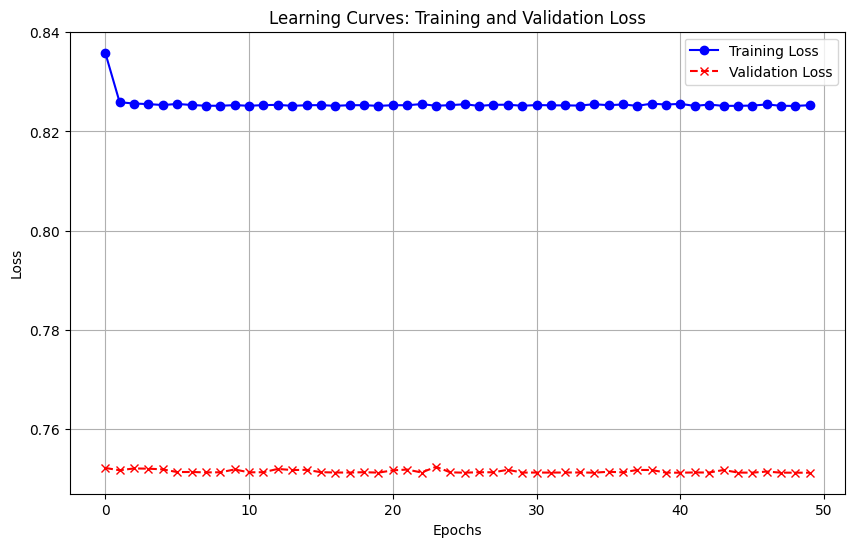

In [ ]:
import matplotlib.pyplot as plt

# Step 1: Extract training and validation loss from history
loss = history.history['loss']
val_loss = history.history['val_loss']

# Step 2: Plot training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(loss, label='Training Loss', color='blue', linestyle='-', marker='o')
plt.plot(val_loss, label='Validation Loss', color='red', linestyle='--', marker='x')
plt.title('Learning Curves: Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd

# Step 1: Extract training and validation loss from history
loss = history.history['loss']
val_loss = history.history['val_loss']

# Step 2: Create a pandas DataFrame to display the data in a table
loss_df = pd.DataFrame({
    'Epoch': range(1, len(loss) + 1),  # Epoch numbers
    'Training Loss': loss,
    'Validation Loss': val_loss
})

# Step 3: Display the table
print(loss_df)

# Optionally, save the table to a CSV file
loss_df.to_csv('training_validation_loss.csv', index=False)

    Epoch  Training Loss  Validation Loss
0       1       0.835885         0.752096
1       2       0.825895         0.751637
2       3       0.825632         0.752002
3       4       0.825519         0.751955
4       5       0.825328         0.751812
5       6       0.825547         0.751274
6       7       0.825342         0.751285
7       8       0.825186         0.751202
8       9       0.825184         0.751226
9      10       0.825308         0.751792
10     11       0.825181         0.751217
11     12       0.825312         0.751241
12     13       0.825365         0.751900
13     14       0.825167         0.751681
14     15       0.825288         0.751721
15     16       0.825312         0.751245
16     17       0.825168         0.751181
17     18       0.825299         0.751169
18     19       0.825295         0.751244
19     20       0.825163         0.751153
20     21       0.825292         0.751620
21     22       0.825288         0.751774
22     23       0.825520         0

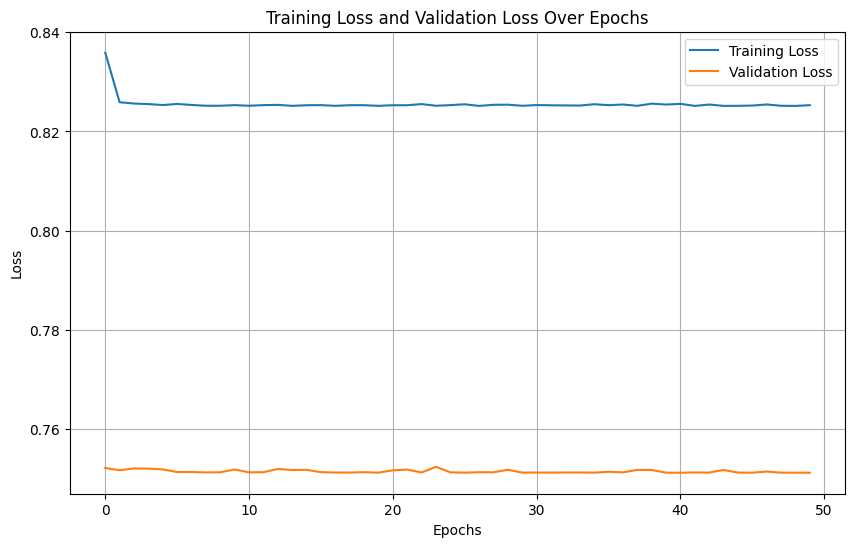

In [ ]:
import matplotlib.pyplot as plt

# Step 1: Train the Autoencoder (as already done in in our code)
# history = autoencoder.fit(X_train, X_train,
#                           epochs=50,
#                           batch_size=32,
#                           validation_data=(X_test, X_test),
#                           verbose=1)

# Step 2: Plot Training Loss and Validation Loss

# Extract loss values from the history object
loss = history.history['loss']
val_loss = history.history['val_loss']

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training Loss and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

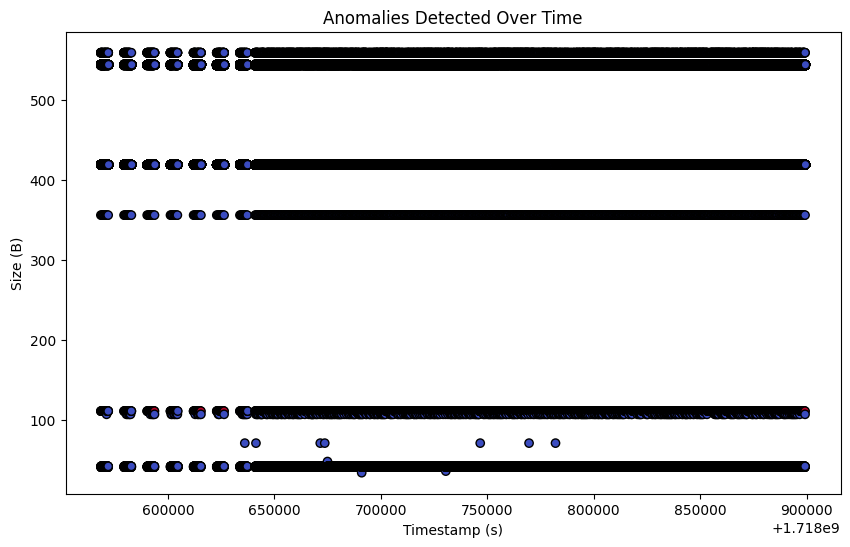

In [ ]:
# Plot anomalies detected over time
plt.figure(figsize=(10, 6))
plt.scatter(df['Timestamp (s)'], df['Size (B)'], c=(df['Anomaly'] == 'Anomaly'), cmap='coolwarm', edgecolors='k')
plt.title('Anomalies Detected Over Time')
plt.xlabel('Timestamp (s)')
plt.ylabel('Size (B)')
plt.show()


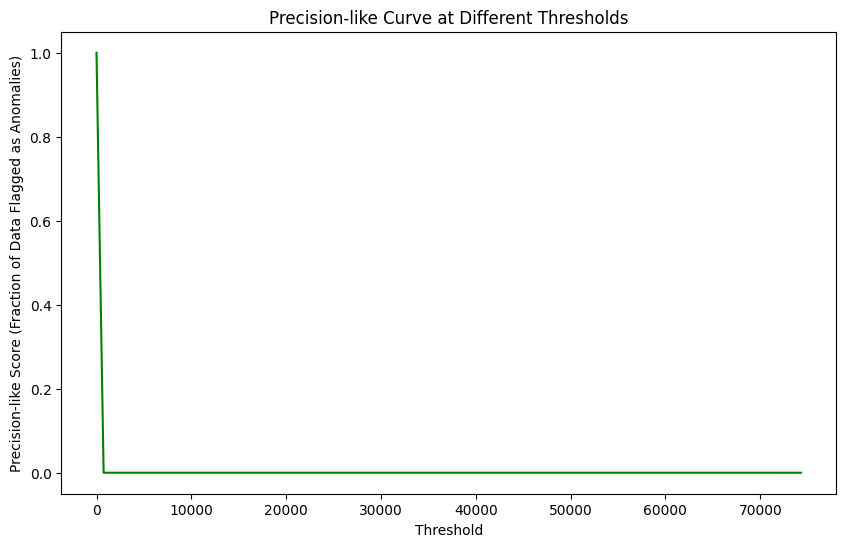

In [ ]:
# Create a range of thresholds
thresholds = np.linspace(min(reconstruction_errors), max(reconstruction_errors), 100)

# Calculate the precision-like metric for each threshold
precision_scores = [(df['Anomaly Score'] > t).mean() for t in thresholds]

# Plot precision-like curve
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision_scores, color='green')
plt.title('Precision-like Curve at Different Thresholds')
plt.xlabel('Threshold')
plt.ylabel('Precision-like Score (Fraction of Data Flagged as Anomalies)')
plt.show()

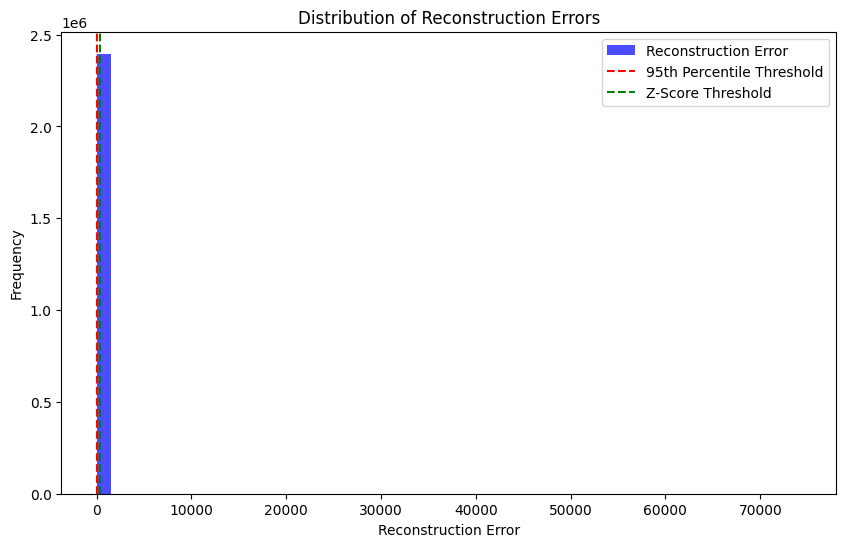

In [ ]:
import matplotlib.pyplot as plt

# Step 1: Define Z-score threshold
z_threshold = 3  # Z-score threshold for anomaly detection

# Step 2: Calculate mean and standard deviation of reconstruction errors
mean_error = np.mean(reconstruction_errors)
std_error = np.std(reconstruction_errors)

# Step 3: Calculate Z-scores for reconstruction errors
z_scores = (reconstruction_errors - mean_error) / std_error

# Step 4: Plot the distribution of reconstruction errors
plt.figure(figsize=(10, 6))
plt.hist(reconstruction_errors, bins=50, alpha=0.7, color='blue', label='Reconstruction Error')
plt.axvline(x=np.percentile(reconstruction_errors, 95), color='red', linestyle='--', label='95th Percentile Threshold')
plt.axvline(x=mean_error + z_threshold * std_error, color='green', linestyle='--', label='Z-Score Threshold')
plt.title('Distribution of Reconstruction Errors')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.legend()
plt.show()


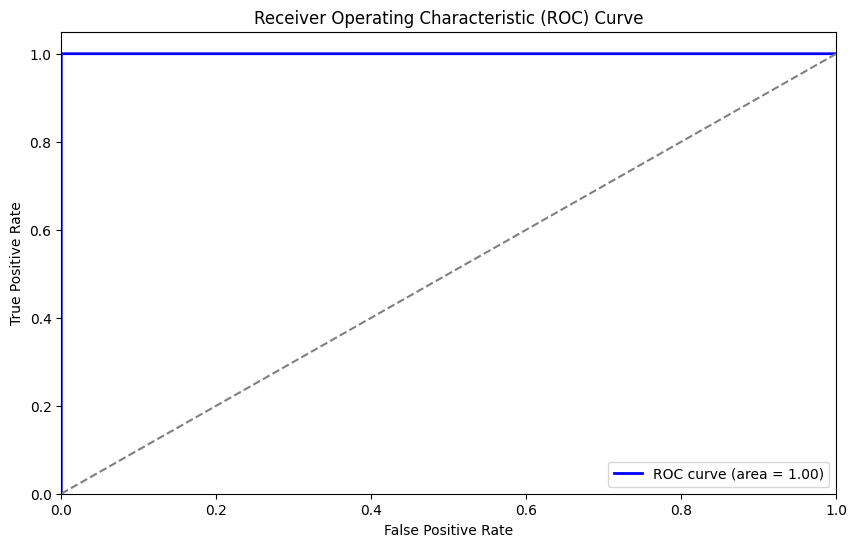

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have actual true labels and predicted anomaly scores
# Example: Use `df['True_Label']` for true labels and `df['Anomaly Score']` for predicted scores

# Generate True Labels and Predicted Scores
y_true = df['True_Label']
y_scores = df['Anomaly Score']

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_scores)

# Compute the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming reconstruction_errors and z_scores are already computed

# Define z-score threshold
z_threshold = 3  # Example z-score threshold, adjust if necessary

# Compute predicted labels based on z-score
df['Predicted_Label'] = (z_scores > z_threshold).astype(int)

# Define true labels based on the same z-score threshold
# Here we assume that if the reconstruction error is high (i.e., above the z-score threshold), it's an anomaly
df['True_Label'] = (z_scores > z_threshold).astype(int)

# Calculate confusion matrix components
tn, fp, fn, tp = confusion_matrix(df['True_Label'], df['Predicted_Label']).ravel()

# Calculate precision, recall, and F1-score
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
